In [1]:
import numpy as np 
import pandas as pd 
import missingno as msno
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
housing = pd.read_csv('housing.csv')
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Categoric column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe(include='all').style.format().background_gradient(cmap='Blues')

<AxesSubplot:>

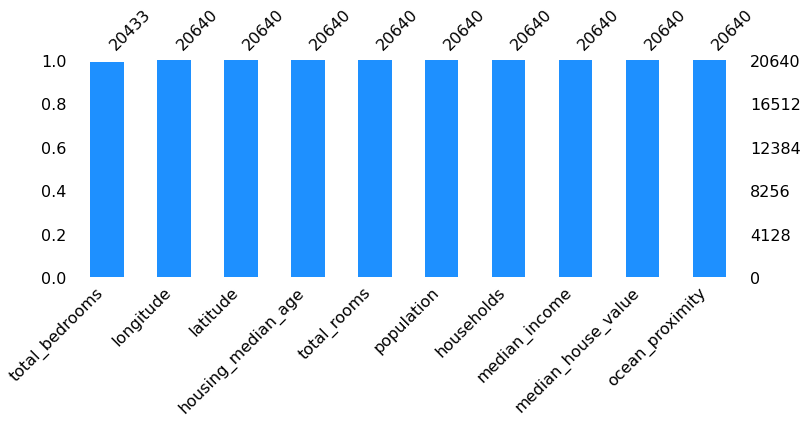

In [6]:
msno.bar(housing, figsize=(12,4), color="dodgerblue", sort="ascending")

In [7]:
# check NaN column and numbers
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

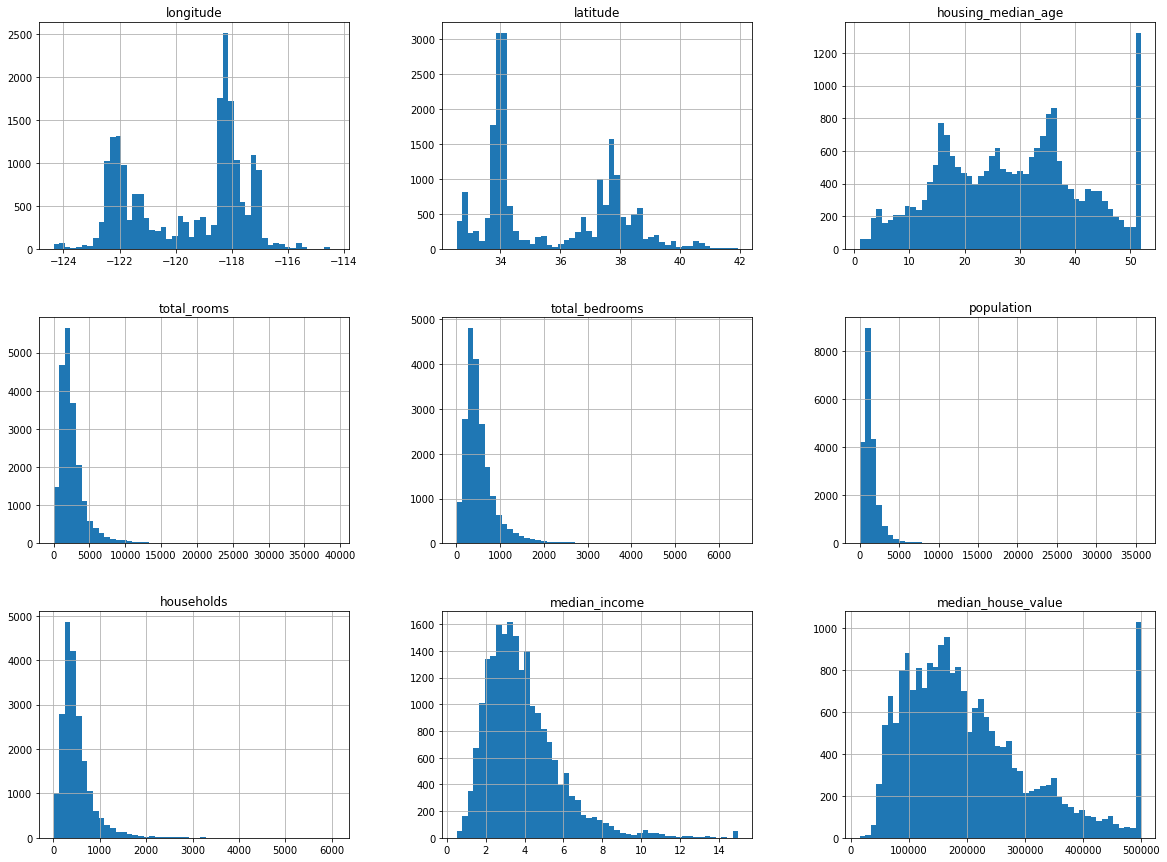

In [10]:
housing.hist(bins=50, figsize=(20,15)) 
plt.show()

In [12]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
housing_with_id = housing.reset_index()
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [13]:
fig = px.scatter(housing, x="longitude", y="latitude", 
                 color="median_house_value", size='population', 
            hover_data=['ocean_proximity'], template="simple_white")
fig.show()

In [14]:
corr_matrix = housing.select_dtypes(include=np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

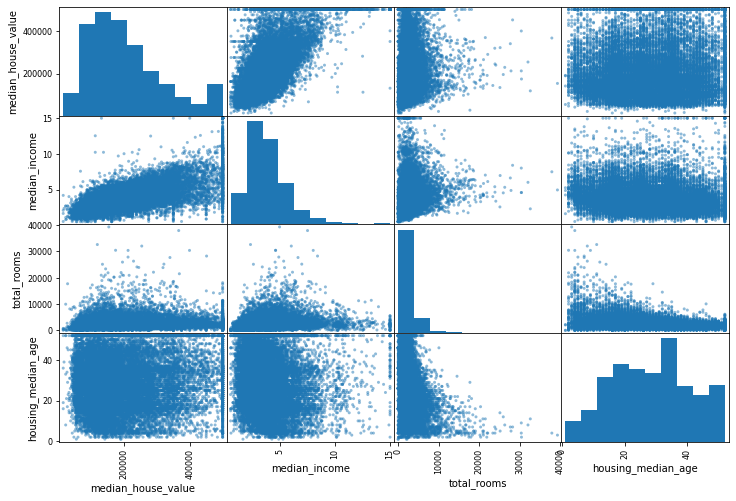

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

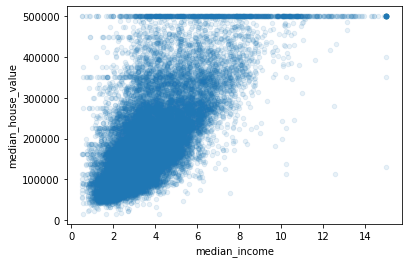

In [16]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
                 alpha=0.1)

In [17]:
# Add new features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [18]:
corr_matrix = housing.select_dtypes(include=np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Data Cleaning

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer. Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

In [19]:
imputer = SimpleImputer(strategy="median")

<pre>Since the median can only be computed on numerical attributes, 
we need to create a copy of the data without the text attribute 
ocean_proximity:</pre>

In [20]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [21]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable

In [22]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [23]:
# Same as these
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [24]:
housing_tr = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)

## Handling Text and Categorical Attributes
preprocess the categorical input feature, ocean_proximity:

In [25]:
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [26]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [28]:
housing_tr['housing_cat']=housing_cat_encoded
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       rooms_per_household  bedrooms_per_room  population_per_household  \
0                 6.984127           0.146591                  2.555556   
1                 6.238137           0.155797                  2.109842   
2                 8.288136           0.129516                  2.802260   
3                 5.817352           0.184458                  2.547945   
4                 6.281853           0.172096                  2.181467   
...                    ...                ...                       ...   
20635             5.045455           0.224625                  2.560606   
20636             6.114035           0.215208                  3.122807   
20637             5.205543           0.215173                  2.325635   
20638             5.329513           0.219892                  2.123209   
20639             5.254717           0.221185                  2.616981   

       housing_cat  
0              3.0  
1              3.0  
2              3.0  
3              3.0  
4              3.0  
...            ...  
20635          1.0  
20636          1.0  
20637          1.0  
20638          1.0  
20639          1.0  

[20640 rows x 13 columns]

## Prepare the Data for Machine Learning Algorithms

In [29]:
y = housing_tr['median_house_value'].copy()
X = housing_tr.drop('median_house_value', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                        X, y, test_size=0.2, random_state=42)

## LinearRegression model

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print('MSE: ', lin_mse)
print('RMSE: ', lin_rmse)

MSE:  4885570662.763147
RMSE:  69896.85731678604


In [32]:
r2_score(y_test, y_pred)

0.6271720704080062

## RandomForestRegressor model

In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print('MSE: ', lin_mse)
print('RMSE: ', lin_rmse)
print('R2 Score: ', r2_score(y_test, y_pred))

MSE:  2519785162.6918917
RMSE:  50197.461715627534
R2 Score:  0.8077100199607556
CPU times: user 11.2 s, sys: 144 ms, total: 11.3 s
Wall time: 11.3 s


## Fine tune model by Grid Search

In [34]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 
                                         'max_features': [2, 3, 4]},
        ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search.fit(X_train, y_train)

CPU times: user 47.4 s, sys: 714 ms, total: 48.2 s
Wall time: 48.6 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [36]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): print(np.sqrt(-mean_score), params)

63453.59616283231 {'max_features': 2, 'n_estimators': 3}
54516.48301387678 {'max_features': 2, 'n_estimators': 10}
52051.46938681462 {'max_features': 2, 'n_estimators': 30}
58589.066939071105 {'max_features': 4, 'n_estimators': 3}
51735.79258319917 {'max_features': 4, 'n_estimators': 10}
49607.14617702199 {'max_features': 4, 'n_estimators': 30}
59054.63861015314 {'max_features': 6, 'n_estimators': 3}
52342.87773841201 {'max_features': 6, 'n_estimators': 10}
50346.961599956856 {'max_features': 6, 'n_estimators': 30}
58973.83239625586 {'max_features': 8, 'n_estimators': 3}
53104.256944208675 {'max_features': 8, 'n_estimators': 10}
50627.53664560542 {'max_features': 8, 'n_estimators': 30}
60881.3218805105 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53207.9300298594 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58706.241142890496 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51620.22949018809 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

## Final Testing

In [38]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions) 
final_rmse = np.sqrt(final_mse)

print('Final MSE: ', final_mse)
print('Final RMSE: ', final_rmse)
print('Final R2 Score: ', r2_score(y_test, final_predictions))

Final MSE:  2443915014.7243557
Final RMSE:  49435.96883570054
Final R2 Score:  0.8134998267483575
